In [2]:
import pandas as pd  # data  
import numpy as np  #mathematics
import matplotlib.pyplot as plt  #plots
import seaborn as sns  #graphics package
from sklearn import datasets  #you might as well get used to sklearn
import os #manage files
os.chdir('C:\\Users\\A4 Dell\\Desktop\\Northwestern University\\Practical Machine Learning\\week1')

In [4]:
#correlation heat map setup for seaborn. Building the corr_chart function and passing def_corr to it.
#Note the colon! 
def corr_chart (df_corr):
    
    #using .corr() to build a correlation matrix
    corr = df_corr.corr()
    
    #using numpy's zeros_like fucntion, we return an array of zeros of the same shape and type.
    #the dtype option forces the data to be boolean.
    #the zeros are stored in "top"
    top = np.zeros_like(corr, dtype=np.bool)
    
    #this numpy function returns the indices from the upper triangle of an array and sets them to TRUE fro use as a mask
    top[np.triu_indices_from(top)] = True
    
    #establish a Matlib (plt) figure container
    fig = plt.figure()
    
    #build function parameters
    fig, ax=plt.subplots(figsize=(12,12))
    
    #define the seaborn heatmap function, plot the passed correlation
    #will use the mask "top" we just built
    #will use a color map of coolwarm
    sns.heatmap(corr, mask=top, cmap='coolwarm',
               center=0, square=True,   #center location and square shape
               linewidths=.5, cbar_kws={'shrink':.5},  #linewidth and colorbar paramenters
               annot=True, annot_kws={'size': 9}, fmt='.3f') #annotation and annotation parameters, 3 decimals
    plt.xticks(rotation=45)   #rotate variable labels on x axis
    plt.yticks(rotation=0) 
    plt.title('Correlation Heat Map')
    
    np.set_printoptions(precision=3)   #set the print options

In [10]:
#read data using pads read_csv funtion
survey = pd.read_csv('mspa-survey-data.csv')

#use the ResponseID as a unique label for the rows and drop from the data.frame
survey.set_index('RespondentID', drop=True, inplace=True)

#examine the structure of the dataframe object
print('\nQuick Exploration of Data -----------------')

#find the length of the dataframe
print('\nNumber of Respondents = ', len(survey))

#show the column/variable names of the dataframe
print(survey.columns)

#printing of the header and first 5 rows
survey.head()


Quick Exploration of Data -----------------

Number of Respondents =  207
Index(['Personal_JavaScalaSpark', 'Personal_JavaScriptHTMLCSS',
       'Personal_Python', 'Personal_R', 'Personal_SAS',
       'Professional_JavaScalaSpark', 'Professional_JavaScriptHTMLCSS',
       'Professional_Python', 'Professional_R', 'Professional_SAS',
       'Industry_JavaScalaSpark', 'Industry_JavaScriptHTMLCSS',
       'Industry_Python', 'Industry_R', 'Industry_SAS',
       'Python_Course_Interest', 'Foundations_DE_Course_Interest',
       'Analytics_App_Course_Interest', 'Systems_Analysis_Course_Interest',
       'Courses_Completed', 'PREDICT400', 'PREDICT401', 'PREDICT410',
       'PREDICT411', 'PREDICT413', 'PREDICT420', 'PREDICT422', 'PREDICT450',
       'PREDICT451', 'PREDICT452', 'PREDICT453', 'PREDICT454', 'PREDICT455',
       'PREDICT456', 'PREDICT457', 'OtherPython', 'OtherR', 'OtherSAS',
       'Other', 'Graduate_Date'],
      dtype='object')


,Personal_JavaScalaSpark,Personal_JavaScriptHTMLCSS,Personal_Python,Personal_R,Personal_SAS,Professional_JavaScalaSpark,Professional_JavaScriptHTMLCSS,Professional_Python,Professional_R,Professional_SAS,...,PREDICT453,PREDICT454,PREDICT455,PREDICT456,PREDICT457,OtherPython,OtherR,OtherSAS,Other,Graduate_Date
RespondentID,,,,,,,,,,,,,,,,,,,,,
5135740122,0,0,0,50,50,0,0,0,25,75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5133300037,10,10,50,30,0,25,25,30,20,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring 2018
5132253300,20,0,40,40,0,0,0,40,40,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall 2018
5132096630,10,10,25,35,20,10,10,25,35,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall 2017
5131990362,20,0,0,70,10,20,0,0,80,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CS-435 with Weka,Fall 2018


In [19]:
#Rename the variables using .rename
survey_df = survey.rename(index=str, columns={
    'Personal_JavaScalaSpark': 'Java',
    'Personal_JavaScriptHTMLCSS': 'JS',
    'Personal_Python': 'Python',
    'Personal_R': 'R',
    'Personal_SAS': 'SAS',
    'Professional_JavaScalaSpark': 'ProfJava',
    'Professional_JavaScriptHTMLCSS': 'ProfJS',
    'Professional_Python': 'ProfPython',
    'Professional_R': 'ProfR',
    'Professional_SAS': 'ProfSAS',
    'Industry_JavaScalaSpark': 'IndJava',
    'Industry_JavaScriptHTMLCSS': 'IndJS',
    'Industry_Python': 'IndPython',
    'Industry_R': 'IndR',
    'Industry_SAS': 'IndSAS',
    'Python_Course_Interest': 'PythonClass',
    'Foundations_DE_Course_Interest': 'DEClass',
    'Analytics_App_Course_Interest': 'AnalyticsAppClass',
    'Systems_Analysis_Course_Interest': 'SystemsAnalysisClass'
})

#define subset dataframe for analysis
software_df = survey_df.loc[:, ('Java', 'JS', 'Python', 'R', 'SAS')]
software_df.head()

#describe the dataset
software_df.describe()

,Java,JS,Python,R,SAS
count,207.000000,207.000000,207.000000,207.000000,207.000000
mean,10.135266,4.797101,31.304348,37.125604,16.637681
std,11.383477,6.757764,15.570982,14.576003,13.626400
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,20.000000,30.000000,5.000000
50%,9.000000,0.000000,30.000000,35.000000,15.000000
75%,20.000000,10.000000,40.000000,50.000000,25.000000
max,70.000000,30.000000,90.000000,100.000000,75.000000


In [17]:
#define subset datafram for student interests in new courses
new_classes_df = survey_df.loc[:, ('PythonClass', 'DEClass', 'AnalyticsAppClass', 'SystemsAnalysisClass', 'Courses_Completed')]
new_classes_df.head()

#describe the dataset
new_classes_df.describe()

,PythonClass,DEClass,AnalyticsAppClass,SystemsAnalysisClass,Courses_Completed
count,206.000000,200.000000,203.000000,200.000000,187.000000
mean,73.529126,58.045000,55.201970,53.630000,6.342246
std,29.835429,32.588079,34.147954,33.539493,3.170849
min,0.000000,0.000000,0.000000,0.000000,1.000000
25%,53.000000,29.500000,25.000000,21.500000,4.000000
50%,82.500000,60.000000,60.000000,51.500000,6.000000
75%,100.000000,89.250000,85.000000,80.250000,9.000000
max,100.000000,100.000000,100.000000,100.000000,12.000000


C:\Users\A4 Dell\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


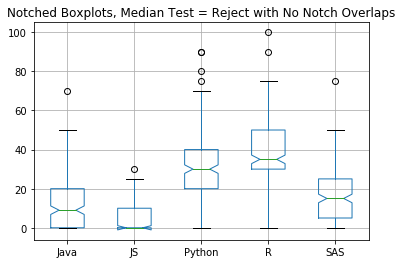

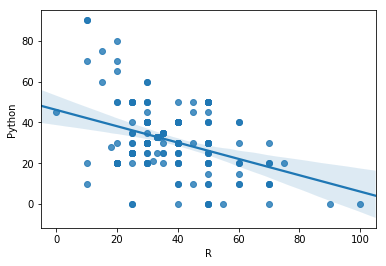

In [20]:
#boxplots
myplot = software_df.plot.box(grid=1, notch=1)
myplot.set_title("Notched Boxplots, Median Test = Reject with No Notch Overlaps")

#single scatter plot 
fig, ax=plt.subplots()
ax = sns.regplot(x="R", y="Python", data=software_df)

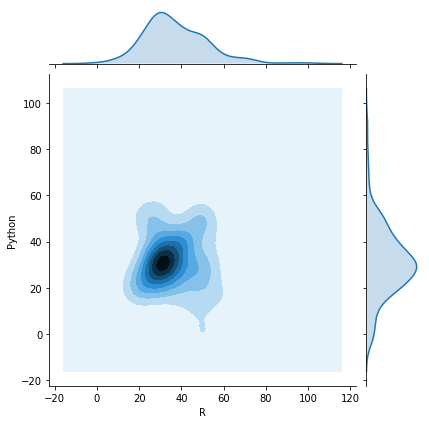

In [21]:
# joint plot
sns.jointplot(x="R", y="Python", data=software_df, kind="kde");

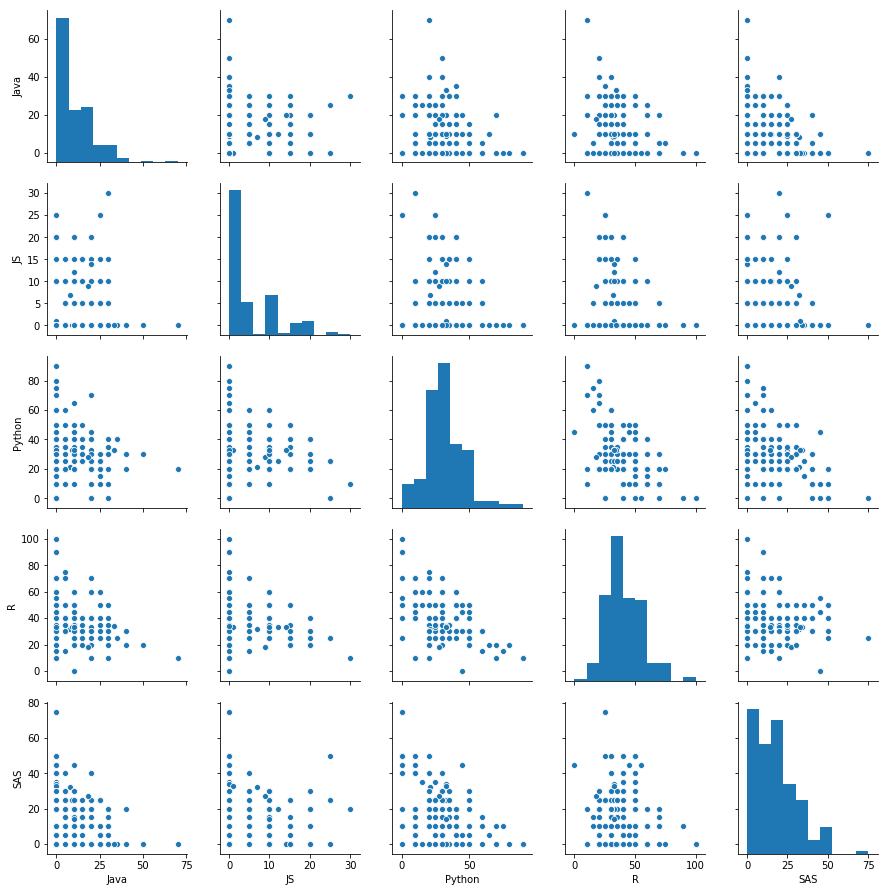

<Figure size 432x288 with 0 Axes>

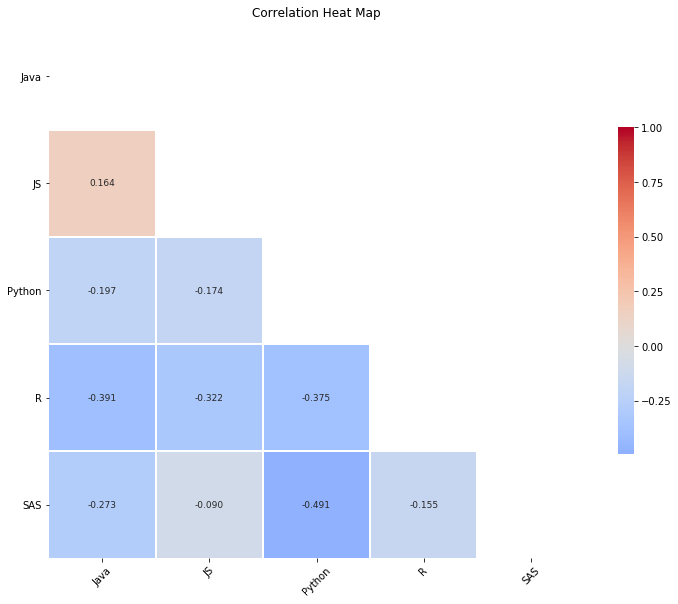

In [22]:
#scatterplot matrix
sns.pairplot(software_df)

#examine intercorrelations among software preference variables with correlaion matrix and heat map
corr_chart(df_corr=software_df)

            Java        JS    Python         R       SAS
Java    1.000000  0.164302 -0.197282 -0.391172 -0.273014
JS      0.164302  1.000000 -0.173517 -0.321997 -0.090473
Python -0.197282 -0.173517  1.000000 -0.374659 -0.491077
R      -0.391172 -0.321997 -0.374659  1.000000 -0.155090
SAS    -0.273014 -0.090473 -0.491077 -0.155090  1.000000


Text(0.5, 1.0, 'Correlation Heat Map')

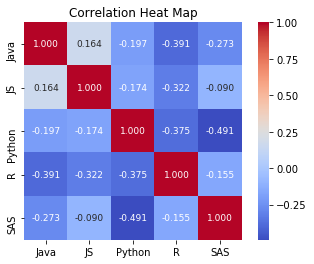

In [23]:
mycorr = software_df.corr()# get the correlation matrix
print(mycorr) #print to verify
sns.heatmap(mycorr, cmap="coolwarm", square=1, annot = True, annot_kws={'size': 9}, fmt = '.3f')
plt.title('Correlation Heat Map')  

                      PythonClass   DEClass  AnalyticsAppClass  \
PythonClass              1.000000  0.337504           0.255525   
DEClass                  0.337504  1.000000           0.449018   
AnalyticsAppClass        0.255525  0.449018           1.000000   
SystemsAnalysisClass     0.278808  0.303449           0.616155   
Courses_Completed       -0.047676 -0.116153          -0.165540   

                      SystemsAnalysisClass  Courses_Completed  
PythonClass                       0.278808          -0.047676  
DEClass                           0.303449          -0.116153  
AnalyticsAppClass                 0.616155          -0.165540  
SystemsAnalysisClass              1.000000          -0.095623  
Courses_Completed                -0.095623           1.000000  


Text(0.5, 1.0, 'Correlation Heat Map for student interests in future courses')

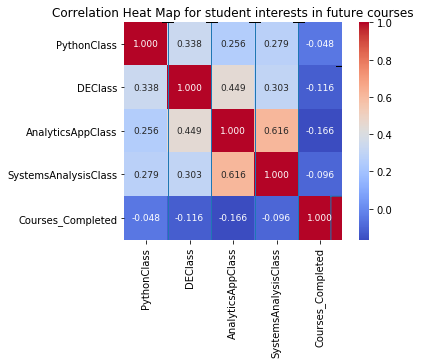

In [25]:
#boxplots
myplot = new_classes_df.plot.box(grid=1, notch=1)
myplot.set_title("Notched Boxplotsfor student interests in future courses, Median Test = Reject with No Notch Overlaps")

mycorr = new_classes_df.corr()# get the correlation matrix
print(mycorr) #print to verify
sns.heatmap(mycorr, cmap="coolwarm", square=1, annot = True, annot_kws={'size': 9}, fmt = '.3f')
plt.title('Correlation Heat Map for student interests in future courses')  

Text(0.5, 1.0, 'Notched Boxplotsfor student interests in future courses, Median Test = Reject with No Notch Overlaps')

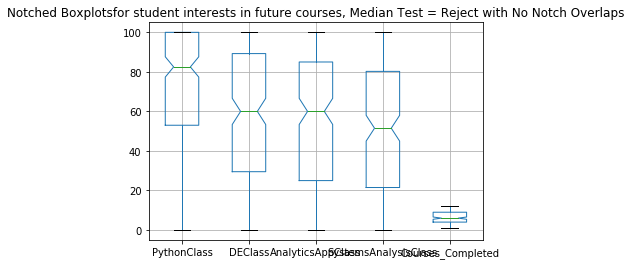

In [26]:
#boxplots
myplot = new_classes_df.plot.box(grid=1, notch=1)
myplot.set_title("Notched Boxplotsfor student interests in future courses, Median Test = Reject with No Notch Overlaps")

C:\Users\A4 Dell\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\A4 Dell\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


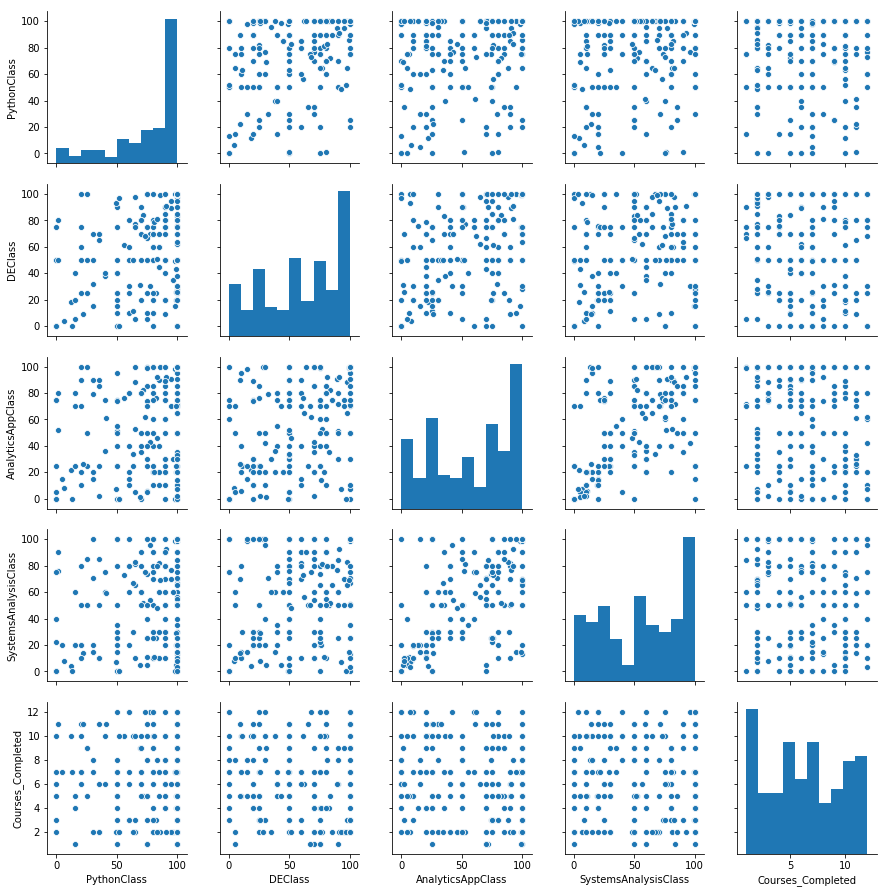

In [27]:
#scatterplot matrix
sns.pairplot(new_classes_df)

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing

#Typical location / scale transformation
X_train=np.array(software_df)
scaler = preprocessing.StandardScaler().fit(X_train)
scaler.mean_
scaler.scale_

C:\Users\A4 Dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([11.356,  6.741, 15.533, 14.541, 13.593])

C:\Users\A4 Dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\A4 Dell\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


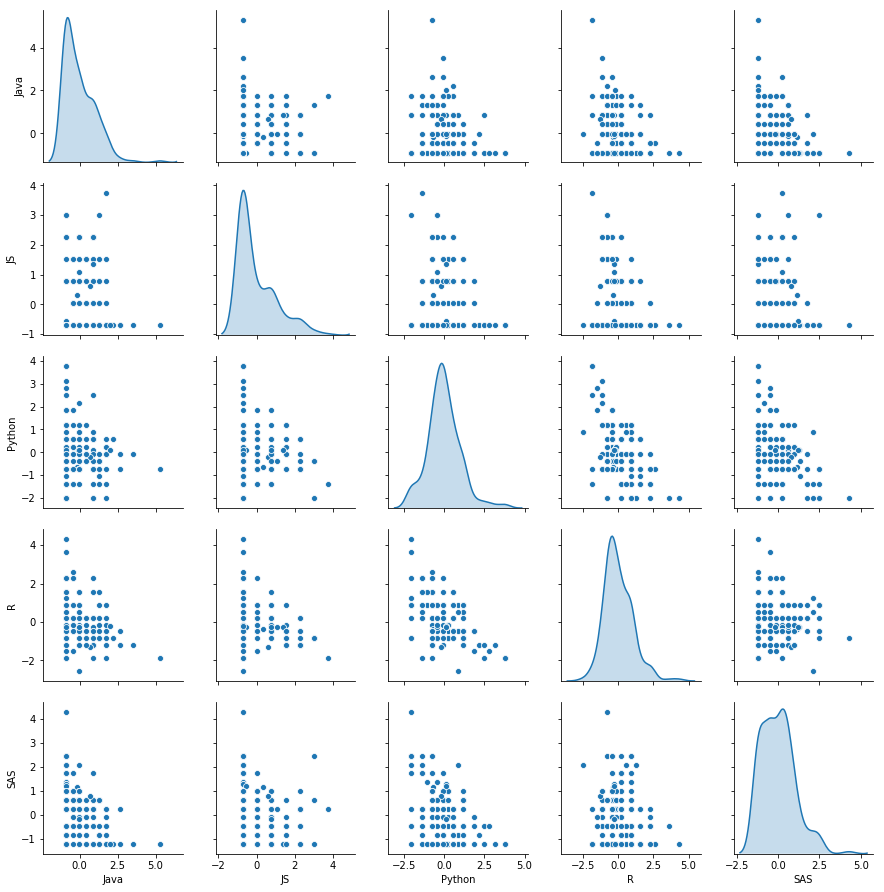

In [30]:
newx=scaler.transform(X_train) 
dataset = pd.DataFrame({'Java':newx[:,0],'JS':newx[:,1], 'Python':newx[:,2], 'R':newx[:,3],'SAS':newx[:,4]})
sns.pairplot(dataset, diag_kind='kde')

C:\Users\A4 Dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\A4 Dell\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


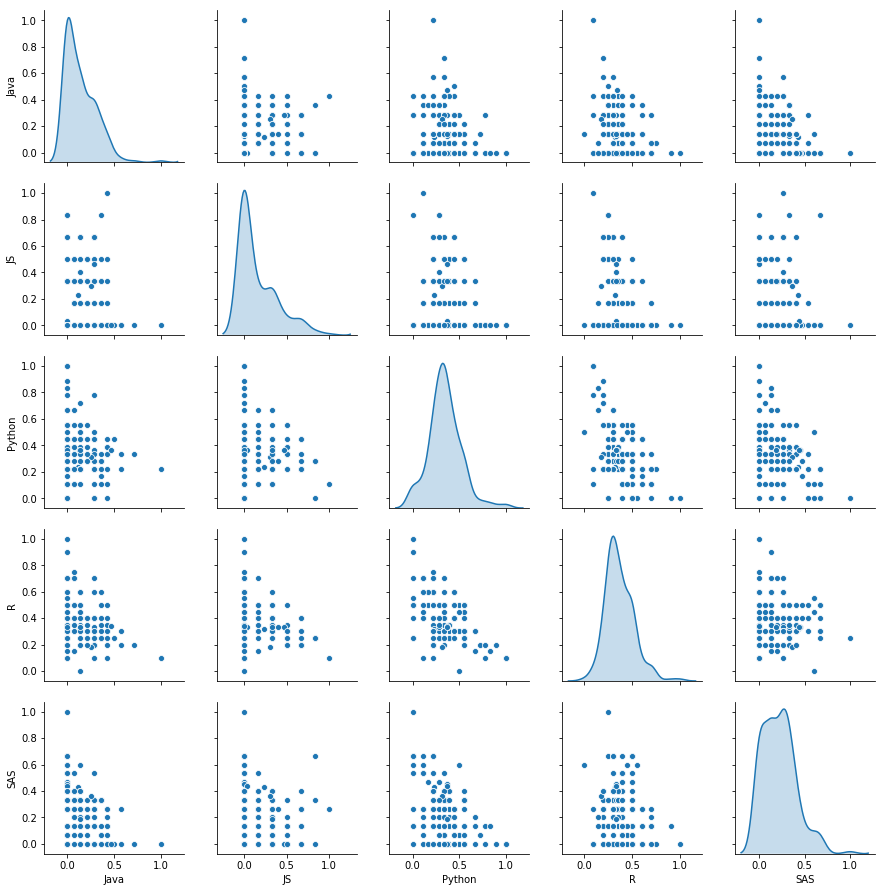

In [32]:
#Typical min/max transformation
min_max_scaler = preprocessing.MinMaxScaler().fit(X_train)
newx2 = min_max_scaler.transform(X_train)
dataset2 = pd.DataFrame({'Java':newx2[:,0],'JS':newx2[:,1], 'Python':newx2[:,2], 'R':newx2[:,3],'SAS':newx2[:,4]})
sns.pairplot(dataset2, diag_kind='kde')